src:
- https://www.youtube.com/watch?v=jztwpsIzEGc
- https://github.com/nicknochnack/ImageClassification/blob/main/Getting%20Started.ipynb

# Dependencies and Setup

In [1]:
import tensorflow as tf

2025-03-11 13:37:57.870398: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-11 13:37:57.873744: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-11 13:37:57.884740: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741696677.902154   82425 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741696677.906947   82425 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-11 13:37:57.923907: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2025-03-11 13:37:59.688434: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
tf.config.list_physical_devices('GPU')

[]

# Load Data

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
path = "../../Database/images"
data = tf.keras.utils.image_dataset_from_directory(path)

Found 2182 files belonging to 22 classes.


In [6]:
data_iterator = data.as_numpy_iterator()

In [7]:
batch = data_iterator.next()

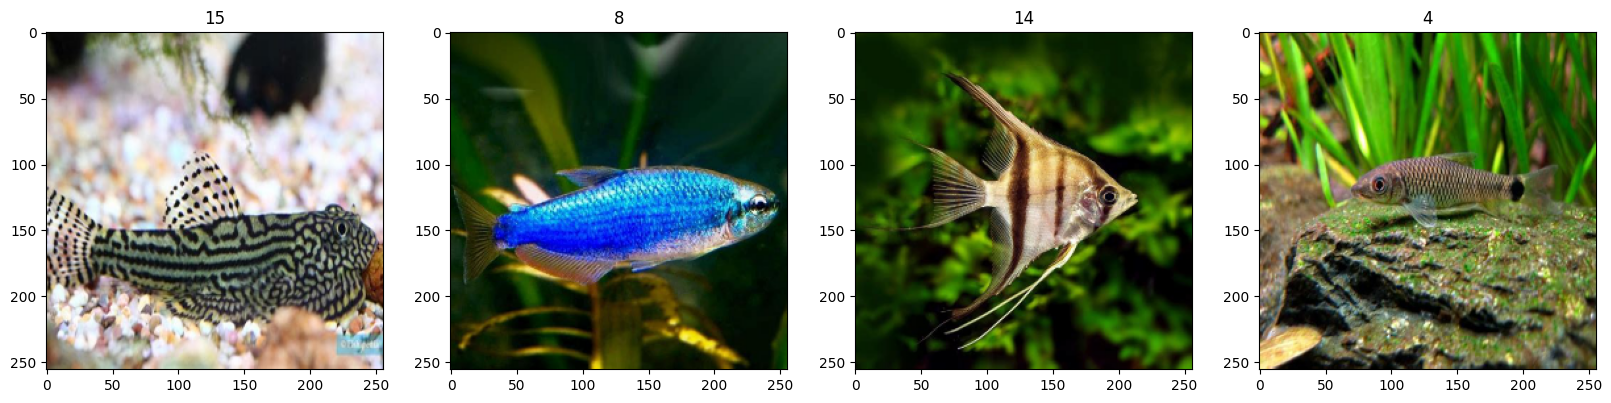

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [9]:
data = data.map(lambda x,y: (x/255, y))

In [10]:
data.as_numpy_iterator().next()

(array([[[[0.453017  , 0.6647817 , 0.03733072],
          [0.44437808, 0.6561428 , 0.03159766],
          [0.43871018, 0.6504097 , 0.0388405 ],
          ...,
          [0.25047487, 0.43086705, 0.00341605],
          [0.24125072, 0.4216429 , 0.        ],
          [0.24313726, 0.42352942, 0.        ]],
 
         [[0.44917512, 0.6609398 , 0.03348885],
          [0.43834952, 0.65011424, 0.03050639],
          [0.43245652, 0.64371574, 0.03346755],
          ...,
          [0.24573778, 0.42612994, 0.        ],
          [0.23878677, 0.41917893, 0.        ],
          [0.2416207 , 0.42201287, 0.        ]],
 
         [[0.44286153, 0.65462625, 0.03223039],
          [0.43167892, 0.64344364, 0.0252378 ],
          [0.4251031 , 0.6363623 , 0.02611413],
          ...,
          [0.24331695, 0.4237091 , 0.        ],
          [0.23385416, 0.41424632, 0.        ],
          [0.2366881 , 0.41708028, 0.        ]],
 
         ...,
 
         [[0.54960173, 0.6907782 , 0.27509192],
          [0.53115

# Split Data

In [11]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [12]:
train_size

48

In [13]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Extract images and labels

In [14]:
train_images = []
train_labels = []

In [15]:
for images, labels in train:
    train_images.append(images.numpy())  # Append image batch
    train_labels.append(labels.numpy())  # Append label batch

2025-03-11 13:38:02.160595: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [16]:
# Convert lists to numpy arrays
train_images = np.concatenate(train_images, axis=0)  # Concatenate all batches along the first axis (samples)
train_labels = np.concatenate(train_labels, axis=0)

In [17]:
val_images = []
val_labels = []

In [18]:
for images, labels in val:
    val_images.append(images.numpy())  # Append image batch
    val_labels.append(labels.numpy())  # Append label batch

print("val_labels before concatenation:", val_labels)

2025-03-11 13:38:03.226373: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


val_labels before concatenation: [array([12,  2, 20, 12,  6, 10,  2, 13, 15, 16, 20, 10, 18,  7, 17, 16, 19,
       16,  5, 18, 14,  3, 19, 10,  8, 13, 20, 21,  7,  5,  7,  5],
      dtype=int32), array([14, 15,  0, 21, 11, 11, 16, 12, 11,  4, 10, 11, 18,  0, 12, 17, 20,
        1, 12,  1,  8,  3, 18, 10,  3,  5, 16, 17,  4,  8, 20,  3],
      dtype=int32), array([19, 19,  5, 14, 12, 17, 16,  7,  1, 18,  5,  4,  2, 13, 19,  3, 14,
       14,  9,  9, 15, 16,  1, 11,  8, 12, 19, 14, 19,  1,  3, 11],
      dtype=int32), array([ 9,  0, 21,  9,  2,  4,  4, 18,  2,  5, 19,  4, 13,  0,  1, 21, 21,
        2,  5,  9,  9, 18,  1, 10, 20, 21,  2,  3,  5, 15, 17,  3],
      dtype=int32), array([ 4,  5, 18, 11,  0,  9,  2, 13, 18,  8,  8, 10,  5, 20,  8, 15, 17,
       12,  6, 13, 18, 12, 20, 20, 16, 16, 13,  7, 14,  8,  8,  6],
      dtype=int32), array([17, 13,  3, 14,  6, 12, 21,  4, 10, 20,  7, 14,  2, 15, 19,  7,  4,
        9, 15,  7,  6,  7, 21,  6, 21, 13,  2,  0, 12, 12, 21,  9],
      dt

In [19]:
# Convert lists to numpy arrays
val_images = np.concatenate(val_images, axis=0)  # Concatenate all batches along the first axis (samples)
val_labels = np.concatenate(val_labels, axis=0)

# Build Deep Learning Model

In [20]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

In [23]:
# First convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# Second convolutional layer
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Third convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Flatten layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(256, activation='relu'))

# Output layer for 22 classes
model.add(Dense(22, activation='softmax'))

/run/media/mad/SATA_SSD/Projekte/Git/AquariumFishWebScraper/AquariumFishRecognition/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
# One-hot encode the labels
# One-hot encode the labels
train_labels_one_hot = to_categorical(train_labels, num_classes=22)
val_labels_one_hot = to_categorical(val_labels, num_classes=22)

# Check shapes of the data
print("train_images shape:", train_images.shape)  # (num_train_samples, height, width, channels)
print("train_labels_one_hot shape:", train_labels_one_hot.shape)  # (num_train_samples, 22)
print("val_images shape:", val_images.shape)  # (num_val_samples, height, width, channels)
print("val_labels_one_hot shape:", val_labels_one_hot.shape)  # (num_val_samples, 22)

train_images shape: (1536, 256, 256, 3)
train_labels_one_hot shape: (1536, 22)
val_images shape: (416, 256, 256, 3)
val_labels_one_hot shape: (416, 22)


In [26]:
# Compile the model with categorical crossentropy
model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 22)             │         5,654 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,702,022 (14.12 MB)

 Trainable params: 3,702,022 (14.12 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train_images, train_labels_one_hot, epochs=20,
                 validation_data=(val_images, val_labels_one_hot),
                 callbacks=[tensorboard_callback])


Epoch 1/20


2025-03-11 13:38:04.798418: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1207959552 exceeds 10% of free system memory.


21/48 ━━━━━━━━━━━━━━━━━━━━ 10s 397ms/step - accuracy: 0.0658 - loss: 3.1057

KeyboardInterrupt: 

# Plot Performance

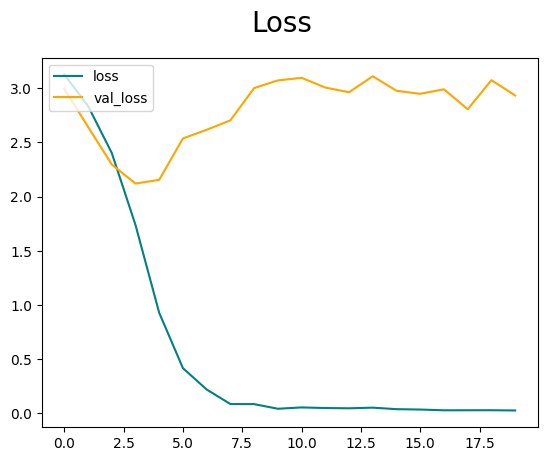

In [159]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

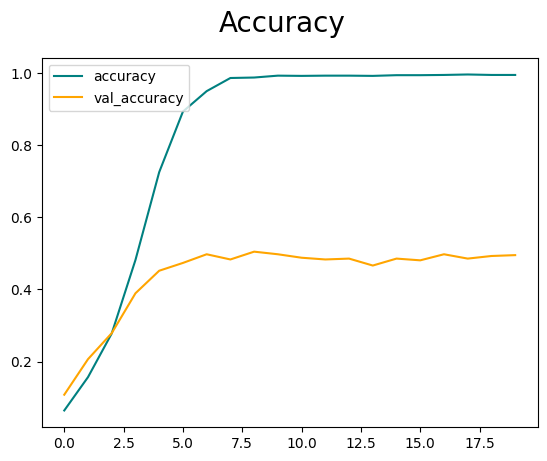

In [160]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [161]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [162]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [163]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


2025-03-11 13:24:50.972070: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: Incompatible shapes: [1,32] vs. [1,704]


InvalidArgumentError: {{function_node __wrapped__LogicalAnd_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [1,32] vs. [1,704] [Op:LogicalAnd] name: 

In [28]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9427083, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.03125, shape=(), dtype=float32)


# Test

In [30]:
import cv2

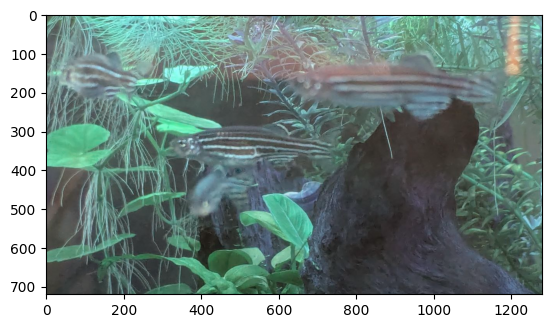

In [31]:
img = cv2.imread('test_pictures/Brachydanio.jpeg')
plt.imshow(img)
plt.show()

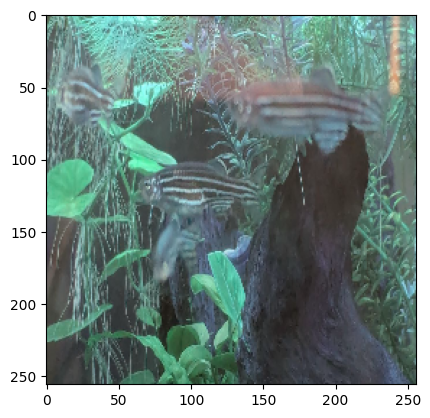

In [32]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [33]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [34]:
yhat

array([[1.]], dtype=float32)

In [35]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# Save the Model